# What are the most demanded skills for the top 3 most popular data roles?

### Methodology
    1. Clean-up skills column
    2. Calculate skill count based on job_title_short
    3. Calculate skill percentage
    4. Plot final findings

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills_list: ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

In [11]:
df_us = df[df['job_country'] == 'United States']
df_skills = df_us.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [18]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name= 'skill_count')
df_skills_count.sort_values(by= 'skill_count', ascending= False, inplace= True)


df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [24]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

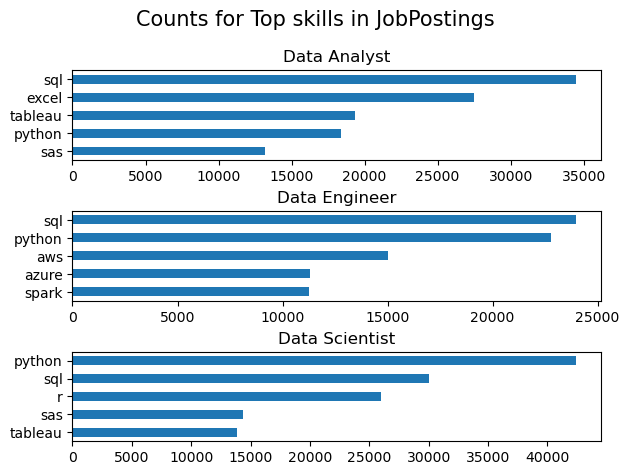

In [33]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skill_count', ax=ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts for Top skills in JobPostings', fontsize = 15)
fig.tight_layout(h_pad= 0.5)
plt.show()

In [36]:
df_job_count = df_us['job_title_short'].value_counts().reset_index(name= 'jobs_total')

In [41]:
df_skills_percentage = df_skills_count.merge(df_job_count, how= 'left', on= 'job_title_short')
df_skills_percentage['skill_percentage'] = 100 * (df_skills_percentage['skill_count'] / df_skills_percentage['jobs_total'])

df_skills_percentage

,job_skills,job_title_short,skill_count,jobs_total,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


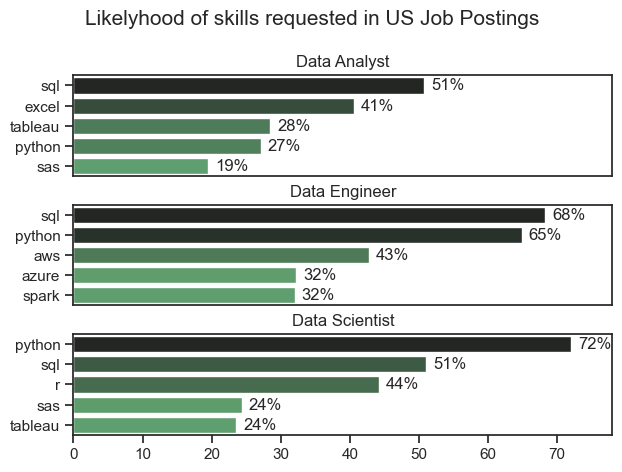

In [59]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style= 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percentage[df_skills_percentage['job_title_short'] == job_title].head()
    
    sns.barplot(data= df_plot, x= 'skill_percentage', y= 'job_skills', ax= ax[i], hue= 'skill_percentage', palette= 'dark:g_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 78)
    ax[i].legend().set_visible(False)
    
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v +1, n, f'{v:.0f}%', va= 'center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelyhood of skills requested in US Job Postings', fontsize = 15)
fig.tight_layout(h_pad= 0.5)
plt.show()